In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# cloning the repo
!git clone https://github.com/kishkath/ERA.git

Cloning into 'ERA'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 104 (delta 36), reused 63 (delta 10), pack-reused 0
Receiving objects: 100% (104/104), 1.28 MiB | 9.03 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [9]:
import os 
os.chdir("/kaggle/working/ERA/8 - Normalization & Regularization Techniques/")

In [13]:
!pip install torchsummary

In [25]:
from utility.dataset import loader
from utility.run import Performance,scores
from utility.visualize import Plots,plot_metrics
from models.model2 import NetArch,return_summary
from utility.utils import allot_device

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 

import torchvision
import torchvision.transforms as transforms

from tqdm import tqdm
import matplotlib.pyplot as plt 
import numpy as np
from torchsummary import summary

In [18]:
## Setting up the device 
device = allot_device(42)
print(f"{device} is available")

cuda is available


In [20]:
## Lets load the data
train_loader,test_loader = loader.load_data(256)
print(len(train_loader),len(test_loader))

/opt/conda/lib/python3.10/site-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


100%|██████████| 170498071/170498071 [00:01<00:00, 102330193.28it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
196 40


<Figure size 640x480 with 0 Axes>

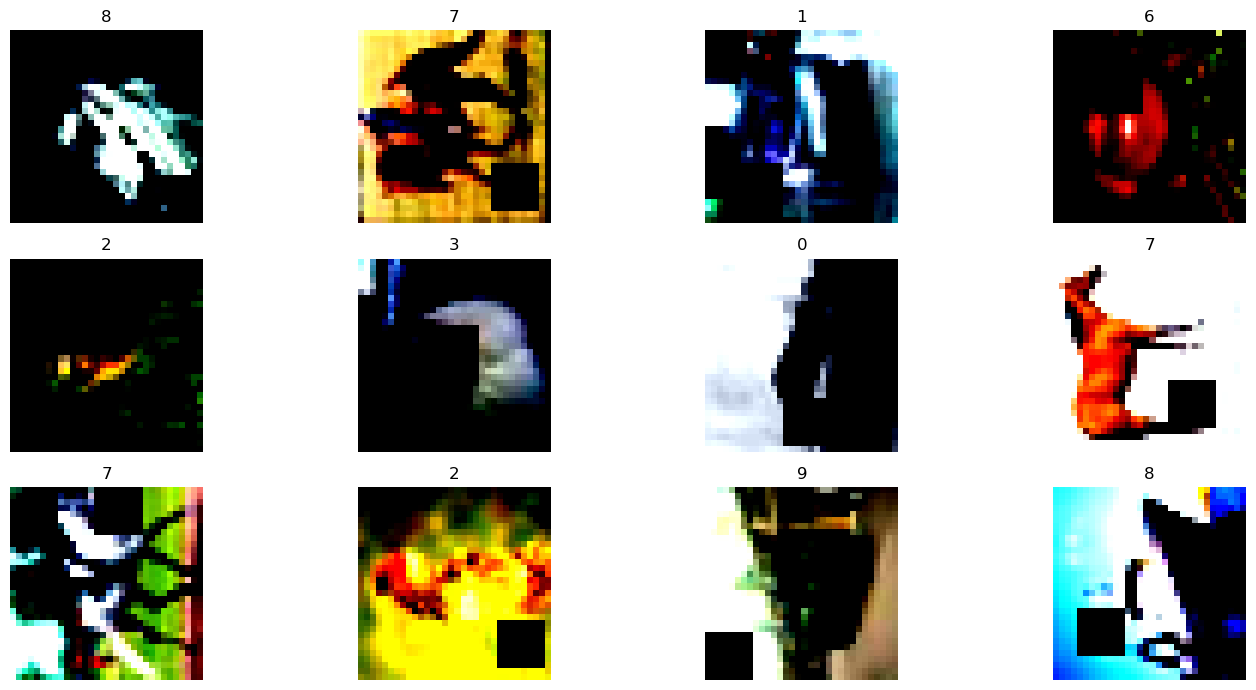

In [22]:
## Visualize train images
Plots(None,12,train_loader).plot_images()

<Figure size 640x480 with 0 Axes>

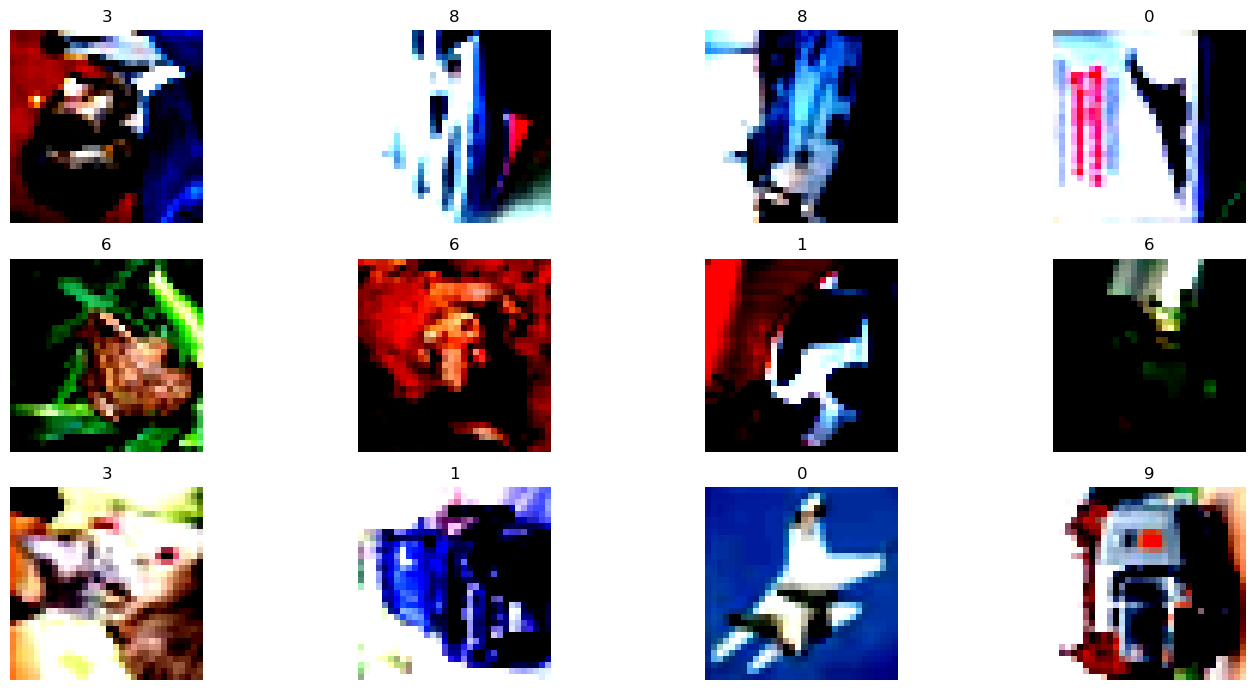

In [23]:
## Visualize test images
Plots(None,12,test_loader).plot_images()

In [26]:
model = NetArch().to(device)
return_summary(model,device,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
         GroupNorm-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           2,304
         GroupNorm-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
            Conv2d-7           [-1, 20, 32, 32]             320
              ReLU-8           [-1, 20, 32, 32]               0
         MaxPool2d-9           [-1, 20, 16, 16]               0
           Conv2d-10           [-1, 20, 16, 16]           3,600
        GroupNorm-11           [-1, 20, 16, 16]              40
             ReLU-12           [-1, 20, 16, 16]               0
           Conv2d-13           [-1, 20, 16, 16]           3,600
        GroupNorm-14           [-1, 20,

In [29]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20
perf = Performance(device,model,(train_loader,test_loader),optimizer,criterion)

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  perf.train()
  perf.test()
#   scheduler.step()

Epoch 1


Train: Loss=1.8932 Batch_id=195 Accuracy=25.63: 100%|██████████| 196/196 [00:21<00:00,  9.23it/s]


Test set: Average loss: 0.0071, Accuracy: 3370/10000 (33.70%)

Epoch 2


Train: Loss=1.6561 Batch_id=195 Accuracy=37.30: 100%|██████████| 196/196 [00:20<00:00,  9.75it/s]


Test set: Average loss: 0.0064, Accuracy: 4114/10000 (41.14%)

Epoch 3


Train: Loss=1.3223 Batch_id=195 Accuracy=44.23: 100%|██████████| 196/196 [00:19<00:00,  9.97it/s]


Test set: Average loss: 0.0057, Accuracy: 4767/10000 (47.67%)

Epoch 4


Train: Loss=1.3523 Batch_id=195 Accuracy=50.31: 100%|██████████| 196/196 [00:20<00:00,  9.72it/s]


Test set: Average loss: 0.0053, Accuracy: 5298/10000 (52.98%)

Epoch 5


Train: Loss=1.4615 Batch_id=195 Accuracy=53.56: 100%|██████████| 196/196 [00:19<00:00,  9.91it/s]


Test set: Average loss: 0.0047, Accuracy: 5707/10000 (57.07%)

Epoch 6


Train: Loss=1.3620 Batch_id=195 Accuracy=56.75: 100%|██████████| 196/196 [00:19<00:00, 10.06it/s]


Test set: Average loss: 0.0044, Accuracy: 6036/10000 (60.36%)

Epoch 7


Train: Loss=0.8432 Batch_id=195 Accuracy=60.48: 100%|██████████| 196/196 [00:19<00:00, 10.21it/s]


Test set: Average loss: 0.0042, Accuracy: 6286/10000 (62.86%)

Epoch 8


Train: Loss=1.0729 Batch_id=195 Accuracy=62.32: 100%|██████████| 196/196 [00:19<00:00,  9.90it/s]


Test set: Average loss: 0.0041, Accuracy: 6366/10000 (63.66%)

Epoch 9


Train: Loss=1.0281 Batch_id=195 Accuracy=64.15: 100%|██████████| 196/196 [00:20<00:00,  9.78it/s]


Test set: Average loss: 0.0039, Accuracy: 6505/10000 (65.05%)

Epoch 10


Train: Loss=0.8676 Batch_id=195 Accuracy=66.14: 100%|██████████| 196/196 [00:19<00:00, 10.03it/s]


Test set: Average loss: 0.0038, Accuracy: 6576/10000 (65.76%)

Epoch 11


Train: Loss=0.9114 Batch_id=195 Accuracy=67.81: 100%|██████████| 196/196 [00:19<00:00,  9.88it/s]


Test set: Average loss: 0.0036, Accuracy: 6914/10000 (69.14%)

Epoch 12


Train: Loss=0.7665 Batch_id=195 Accuracy=68.98: 100%|██████████| 196/196 [00:19<00:00,  9.89it/s]


Test set: Average loss: 0.0037, Accuracy: 6817/10000 (68.17%)

Epoch 13


Train: Loss=0.8317 Batch_id=195 Accuracy=70.51: 100%|██████████| 196/196 [00:19<00:00, 10.11it/s]


Test set: Average loss: 0.0032, Accuracy: 7218/10000 (72.18%)

Epoch 14


Train: Loss=0.9550 Batch_id=195 Accuracy=71.23: 100%|██████████| 196/196 [00:19<00:00,  9.86it/s]


Test set: Average loss: 0.0031, Accuracy: 7303/10000 (73.03%)

Epoch 15


Train: Loss=0.8636 Batch_id=195 Accuracy=71.42: 100%|██████████| 196/196 [00:19<00:00,  9.84it/s]


Test set: Average loss: 0.0031, Accuracy: 7311/10000 (73.11%)

Epoch 16


Train: Loss=0.8025 Batch_id=195 Accuracy=73.04: 100%|██████████| 196/196 [00:19<00:00, 10.11it/s]


Test set: Average loss: 0.0031, Accuracy: 7266/10000 (72.66%)

Epoch 17


Train: Loss=0.7170 Batch_id=195 Accuracy=73.01: 100%|██████████| 196/196 [00:19<00:00, 10.03it/s]


Test set: Average loss: 0.0035, Accuracy: 7117/10000 (71.17%)

Epoch 18


Train: Loss=0.6432 Batch_id=195 Accuracy=73.90: 100%|██████████| 196/196 [00:19<00:00,  9.99it/s]


Test set: Average loss: 0.0032, Accuracy: 7212/10000 (72.12%)

Epoch 19


Train: Loss=0.9757 Batch_id=195 Accuracy=74.53: 100%|██████████| 196/196 [00:19<00:00, 10.04it/s]


Test set: Average loss: 0.0033, Accuracy: 7175/10000 (71.75%)

Epoch 20


Train: Loss=0.7274 Batch_id=195 Accuracy=75.34: 100%|██████████| 196/196 [00:19<00:00, 10.30it/s]


Test set: Average loss: 0.0029, Accuracy: 7525/10000 (75.25%)



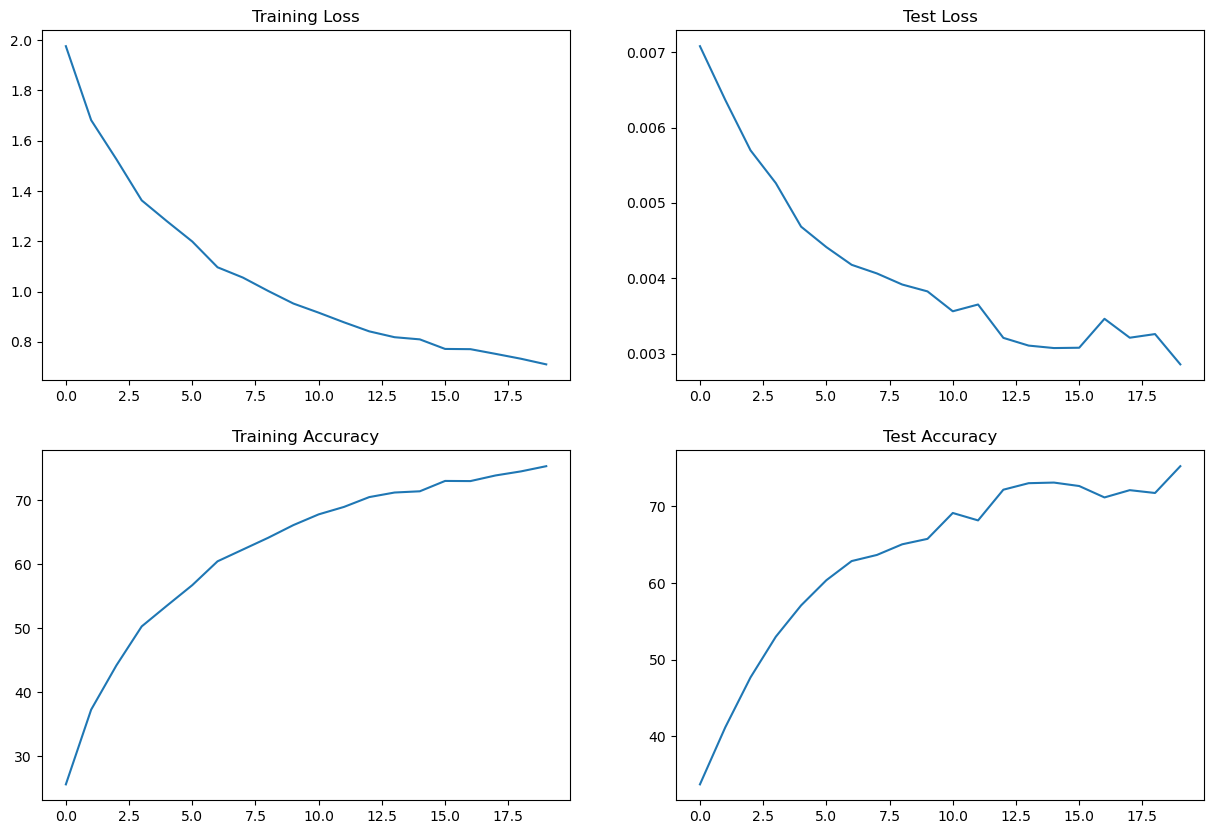

In [30]:
metrics = scores()
plot_metrics(metrics)

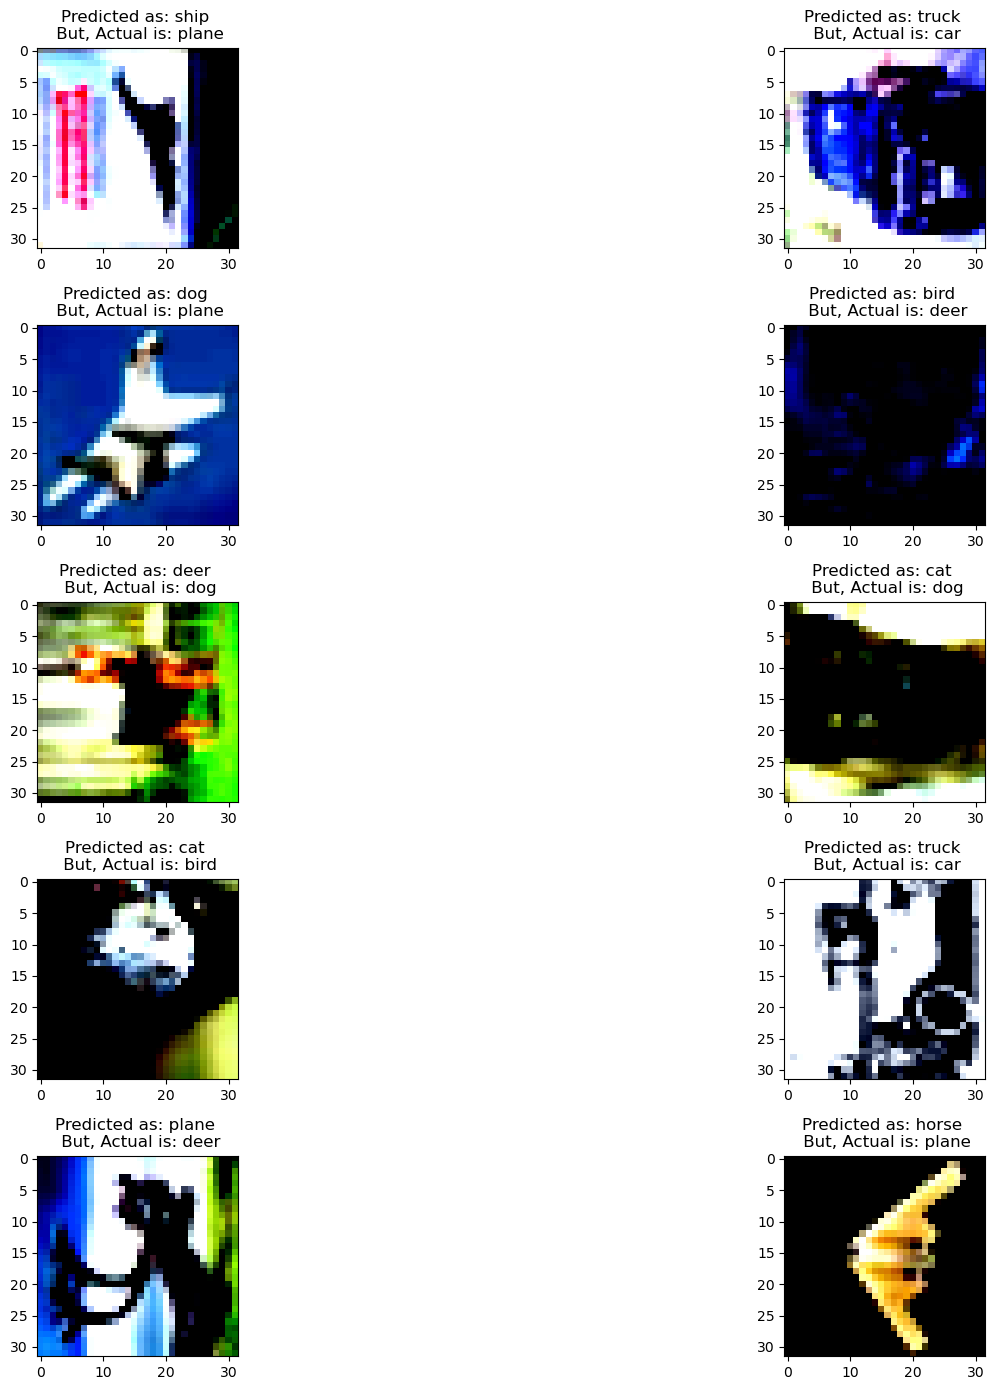

In [31]:
## Visualizing Mis-classified Images

Plots((model,test_loader,device,10)).mis_classified()

In [32]:
torch.save(model,"model_ln.pt")